In [43]:
import pandas as pd


df = pd.read_csv("advertising.csv")

In [44]:
headers = ["index", 'TV', 'Radio', 'Newspaper', 'Sales']
print("headers\n", headers)

headers
 ['index', 'TV', 'Radio', 'Newspaper', 'Sales']


In [47]:
df.column=headers
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [48]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

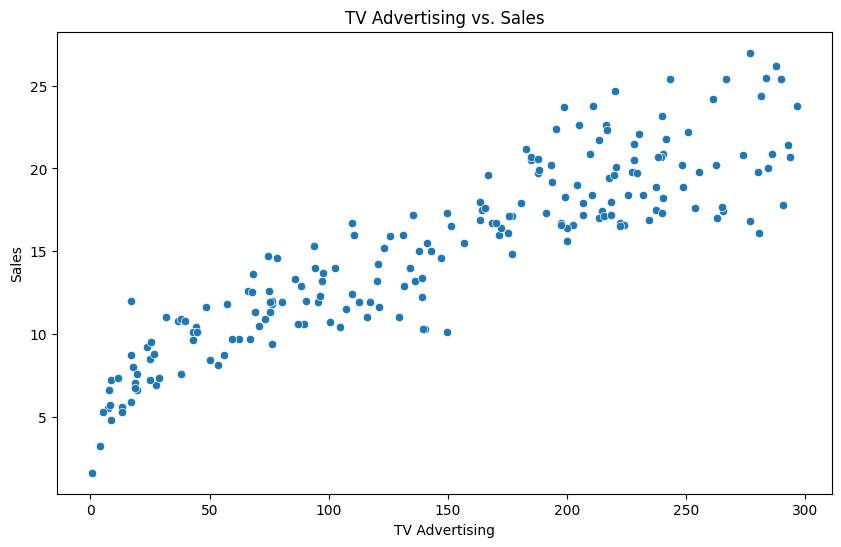

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs. Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


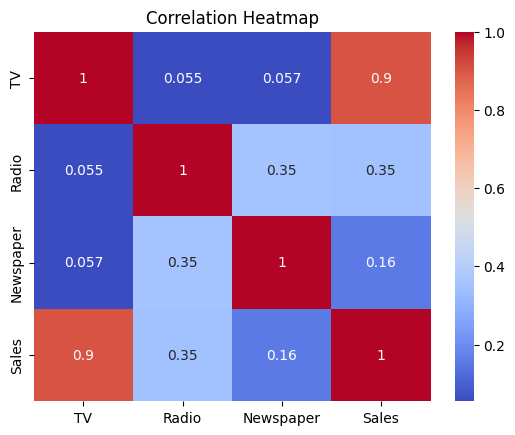

In [52]:
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

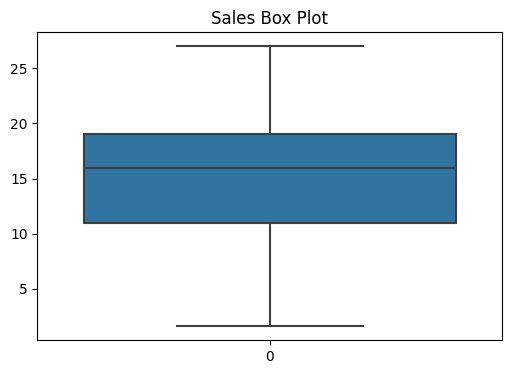

In [53]:
plt.figure(figsize=(6, 4))
sns.boxplot(df['Sales'])
plt.title('Sales Box Plot')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

In [61]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.9077569102710896
Root Mean Squared Error: 1.7052146229349223
Mean Absolute Error: 1.2748262109549338


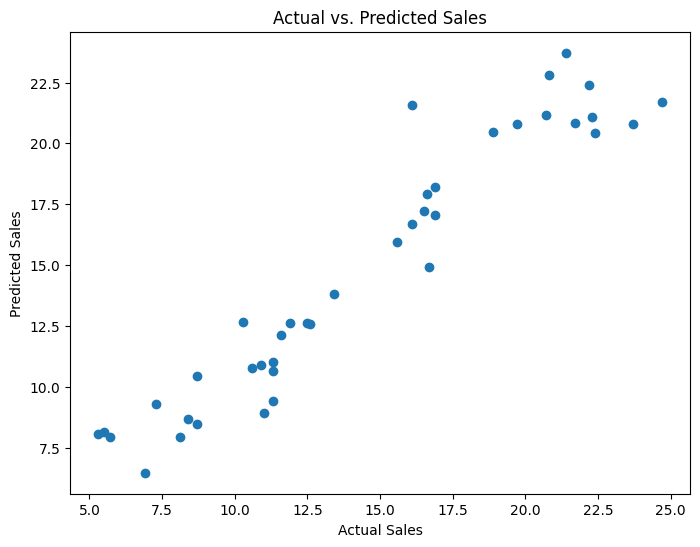

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()